# Geographic Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('../data/processed/online_retail_cleaned.csv')

### 1. Revenue by Country

In [14]:
# Aggregate revenue by country (exclude any cancellations)
country_revenue = (
    df
    .groupby('Country')
    .agg(Revenue=('TotalPrice', 'sum'))
    .sort_values('Revenue', ascending=False)
    .reset_index()
)

country_revenue.head(10)


,Country,Revenue
0,United Kingdom,8167128.184
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110
5,Australia,137009.770
6,Switzerland,56363.050
7,Spain,54756.030
8,Belgium,40910.960
9,Sweden,36585.410


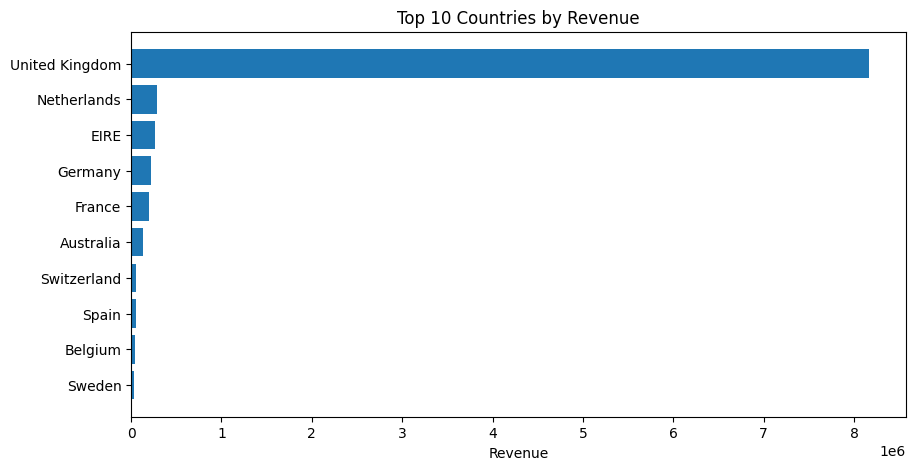

In [15]:
# top 10 countries by revenue
top_countries = country_revenue.head(10)

plt.figure(figsize=(10,5))
plt.barh(top_countries['Country'], top_countries['Revenue'])
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Revenue Share of each Country(Market Concentration)
country_revenue['Revenue_Share (%)'] = (
    country_revenue['Revenue'] /
    country_revenue['Revenue'].sum() * 100
)

country_revenue


,Country,Revenue,Revenue_Share (%)
0,United Kingdom,8979619.974,84.553966
1,Netherlands,285446.340,2.687822
2,EIRE,283140.520,2.666110
3,Germany,228678.400,2.153283
4,France,209625.370,1.973876
5,Australia,138453.810,1.303710
6,Spain,61558.560,0.579648
7,Switzerland,57067.600,0.537360
8,Belgium,41196.340,0.387913
9,Sweden,38367.830,0.361279


#### Results/Interpretation:
- Revenue is highly concentrated in the United Kingdom, which alone contributes ~85% of total revenue, indicating strong dependence on a single market.
- The remaining countries individually contribute less than 3% each, suggesting fragmented international sales with potential opportunities for targeted expansion and risk diversification beyond the UK market.

### 2. Customers vs Revenue by Country

In [18]:
# Aggregate customers and revenue by country
country_customer_revenue = (
    df
    .groupby('Country')
    .agg(
        Customers=('CustomerID', 'nunique'),
        Revenue=('TotalPrice', 'sum')
    )
    .sort_values('Revenue', ascending=False)
    .reset_index()
)

country_customer_revenue


,Country,Customers,Revenue
0,United Kingdom,3951,8167128.184
1,Netherlands,9,284661.540
2,EIRE,4,262993.380
3,Germany,95,221509.470
4,France,88,197317.110
5,Australia,9,137009.770
6,Switzerland,22,56363.050
7,Spain,31,54756.030
8,Belgium,25,40910.960
9,Sweden,8,36585.410


#### Results/Interpretation:

- A higher number of customers does not always translate into higher revenue.
- While the UK dominates due to its large customer base, several countries (e.g., Netherlands, EIRE, Australia) generate high revenue from very few customers, indicating high-value markets.
- Countries with more customers but lower revenue reflect volume-driven, lower-spend behavior.

## 3. UK: Top revenue generating customer

In [24]:
uk_top_customers = (
    df[(df['Country'] == 'United Kingdom') & (df['CustomerID'] != 'ANONYMOUS')]
    .groupby('CustomerID')
    .agg(
        Revenue = ('TotalPrice' , 'sum')
    )
    .sort_values('Revenue', ascending=False)
)
uk_top_customers.head(10)

,Revenue
CustomerID,
18102.0,256438.49
17450.0,187322.17
17511.0,88125.38
16684.0,65892.08
13694.0,62690.54
15311.0,59284.19
13089.0,57322.13
14096.0,57120.91
15061.0,54228.74
